## 1  Data for Preprocessing

In [21]:
# Reload fresh data for preprocessing
df_raw = pd.read_csv('../data/raw/cirrhosis.csv')

print("=" * 60)
print("RAW DATASET OVERVIEW")
print("=" * 60)
print(f"Shape: {df_raw.shape}")
print(f"Total Records: {df_raw.shape[0]:,}")
print(f"Total Features: {df_raw.shape[1]}")
print(f"\nColumns: {list(df_raw.columns)}")
df_raw.head()

RAW DATASET OVERVIEW
Shape: (25000, 19)
Total Records: 25,000
Total Features: 19

Columns: ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


## 2 Check Data Types and Missing Values

In [22]:
# Check data types
print("=" * 60)
print("DATA TYPES")
print("=" * 60)
print(df_raw.dtypes)

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)
missing = df_raw.isnull().sum()
missing_pct = (missing / len(df_raw) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

print(missing_df)
print(f"\nTotal Missing Values: {missing.sum()}")

DATA TYPES
N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

MISSING VALUES ANALYSIS
               Missing Count  Missing %
N_Days                     0        0.0
Cholesterol                0        0.0
Prothrombin                0        0.0
Platelets                  0        0.0
Tryglicerides              0        0.0
SGOT                       0        0.0
Alk_Phos                   0        0.0
Copper                     0        0.0
Albumin                    0        0.0
Bilirubin                  0        0.0
Status                     0       

## 3 Convert Age from Days to Years

✅ Age converted from days to years

Age Statistics (Years):
  Min: 26.3 years
  Max: 78.4 years
  Mean: 50.6 years
  Median: 50.6 years


C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\2266254588.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Status', y='Age_Years', ax=axes[1], palette='Set2')


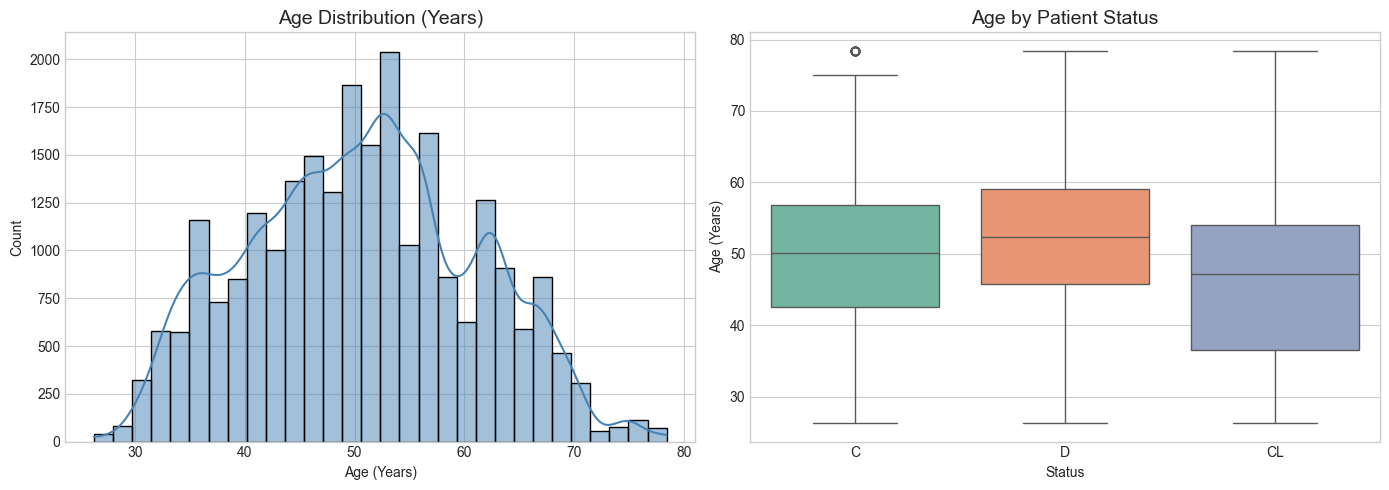

In [23]:
# Convert Age from days to years
df_clean = df_raw.copy()

# Age conversion: days -> years
df_clean['Age_Years'] = (df_clean['Age'] / 365.25).round(1)

# Drop original Age column (in days)
df_clean = df_clean.drop(columns=['Age'])

print("✅ Age converted from days to years")
print(f"\nAge Statistics (Years):")
print(f"  Min: {df_clean['Age_Years'].min():.1f} years")
print(f"  Max: {df_clean['Age_Years'].max():.1f} years")
print(f"  Mean: {df_clean['Age_Years'].mean():.1f} years")
print(f"  Median: {df_clean['Age_Years'].median():.1f} years")

# Visualize age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_clean['Age_Years'], kde=True, ax=axes[0], color='steelblue', bins=30)
axes[0].set_title('Age Distribution (Years)', fontsize=14)
axes[0].set_xlabel('Age (Years)')

sns.boxplot(data=df_clean, x='Status', y='Age_Years', ax=axes[1], palette='Set2')
axes[1].set_title('Age by Patient Status', fontsize=14)
axes[1].set_ylabel('Age (Years)')

plt.tight_layout()
plt.show()

## 4 Handle Missing Values

In [24]:
# Handle Missing Values
print("=" * 60)
print("HANDLING MISSING VALUES")
print("=" * 60)

# Define column types
numerical_cols = ['N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 
                  'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_Years']
categorical_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Check missing before imputation
print("\nBefore Imputation:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Impute numerical columns with MEDIAN (robust to outliers)
for col in numerical_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            median_val = df_clean[col].median()
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  ✓ {col}: Imputed {missing_count} values with median ({median_val:.2f})")

# Impute categorical columns with MODE (most frequent)
for col in categorical_cols:
    if col in df_clean.columns:
        missing_count = df_clean[col].isnull().sum()
        if missing_count > 0:
            mode_val = df_clean[col].mode()[0]
            df_clean[col] = df_clean[col].fillna(mode_val)
            print(f"  ✓ {col}: Imputed {missing_count} values with mode ('{mode_val}')")

# Handle Stage separately (ordinal)
if 'Stage' in df_clean.columns:
    missing_count = df_clean['Stage'].isnull().sum()
    if missing_count > 0:
        median_stage = df_clean['Stage'].median()
        df_clean['Stage'] = df_clean['Stage'].fillna(median_stage)
        print(f"  ✓ Stage: Imputed {missing_count} values with median ({median_stage:.0f})")

# Verify no missing values remain
print(f"\n✅ After Imputation - Missing Values: {df_clean.isnull().sum().sum()}")

HANDLING MISSING VALUES

Before Imputation:
Series([], dtype: int64)

✅ After Imputation - Missing Values: 0


## 5 Check and Handle Outliers

In [25]:
# Check for outliers using IQR method
print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check outliers for key numerical features
check_cols = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 
              'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age_Years']

outlier_summary = []
for col in check_cols:
    if col in df_clean.columns:
        count, lower, upper = detect_outliers_iqr(df_clean, col)
        pct = (count / len(df_clean)) * 100
        outlier_summary.append({
            'Feature': col,
            'Outliers': count,
            'Percentage': f"{pct:.2f}%",
            'Lower Bound': f"{lower:.2f}",
            'Upper Bound': f"{upper:.2f}"
        })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

# Note: We'll keep outliers for medical data as they may represent severe cases
print("\n⚠️ Note: Outliers retained as they may represent clinically significant severe cases.")

OUTLIER DETECTION (IQR Method)
      Feature  Outliers Percentage Lower Bound Upper Bound
    Bilirubin      3274     13.10%       -3.10        7.30
  Cholesterol      2252      9.01%      133.23      511.28
      Albumin       745      2.98%        2.60        4.44
       Copper      2335      9.34%      -30.50      189.50
     Alk_Phos      2177      8.71%     -393.98     3408.64
         SGOT      1743      6.97%       27.73      199.12
Tryglicerides      2399      9.60%       39.50      179.50
    Platelets       368      1.47%        6.00      494.00
  Prothrombin       772      3.09%        8.35       12.75
    Age_Years         0      0.00%       21.40       79.00

⚠️ Note: Outliers retained as they may represent clinically significant severe cases.


## 6 Feature Engineering - Create Derived Features

In [26]:
# Feature Engineering - Create clinically relevant derived features
print("=" * 60)
print("FEATURE ENGINEERING")
print("=" * 60)

# 1. Bilirubin Category (Clinical severity)
df_clean['Bilirubin_Category'] = pd.cut(
    df_clean['Bilirubin'],
    bins=[0, 1.2, 3.0, 10, float('inf')],
    labels=['Normal', 'Mild', 'Moderate', 'Severe']
)
print("✓ Created 'Bilirubin_Category' (Normal < 1.2, Mild 1.2-3.0, Moderate 3-10, Severe > 10)")

# 2. Albumin Category
df_clean['Albumin_Category'] = pd.cut(
    df_clean['Albumin'],
    bins=[0, 2.8, 3.5, float('inf')],
    labels=['Low', 'Borderline', 'Normal']
)
print("✓ Created 'Albumin_Category' (Low < 2.8, Borderline 2.8-3.5, Normal > 3.5)")

# 3. Age Group
df_clean['Age_Group'] = pd.cut(
    df_clean['Age_Years'],
    bins=[0, 40, 50, 60, 70, float('inf')],
    labels=['<40', '40-50', '50-60', '60-70', '>70']
)
print("✓ Created 'Age_Group' (<40, 40-50, 50-60, 60-70, >70)")

# 4. Has Complications (any of: Ascites, Hepatomegaly, Spiders, Edema=Y)
df_clean['Has_Complications'] = (
    (df_clean['Ascites'] == 'Y') | 
    (df_clean['Hepatomegaly'] == 'Y') | 
    (df_clean['Spiders'] == 'Y') |
    (df_clean['Edema'] == 'Y')
).astype(int)
print("✓ Created 'Has_Complications' (1 if any of Ascites/Hepatomegaly/Spiders/Edema=Y)")

# 5. Complication Count
df_clean['Complication_Count'] = (
    (df_clean['Ascites'] == 'Y').astype(int) + 
    (df_clean['Hepatomegaly'] == 'Y').astype(int) + 
    (df_clean['Spiders'] == 'Y').astype(int) +
    (df_clean['Edema'].isin(['Y', 'S'])).astype(int)
)
print("✓ Created 'Complication_Count' (0-4)")

# 6. Prothrombin Status
df_clean['Prothrombin_Status'] = pd.cut(
    df_clean['Prothrombin'],
    bins=[0, 11, 13.5, float('inf')],
    labels=['Normal', 'Borderline', 'Elevated']
)
print("✓ Created 'Prothrombin_Status' (Normal < 11, Borderline 11-13.5, Elevated > 13.5)")

# 7. Stage as integer
df_clean['Stage'] = df_clean['Stage'].astype(int)
print("✓ Converted 'Stage' to integer")

print(f"\n📊 New Features Added: Bilirubin_Category, Albumin_Category, Age_Group, Has_Complications, Complication_Count, Prothrombin_Status")

FEATURE ENGINEERING
✓ Created 'Bilirubin_Category' (Normal < 1.2, Mild 1.2-3.0, Moderate 3-10, Severe > 10)
✓ Created 'Albumin_Category' (Low < 2.8, Borderline 2.8-3.5, Normal > 3.5)
✓ Created 'Age_Group' (<40, 40-50, 50-60, 60-70, >70)
✓ Created 'Has_Complications' (1 if any of Ascites/Hepatomegaly/Spiders/Edema=Y)
✓ Created 'Complication_Count' (0-4)
✓ Created 'Prothrombin_Status' (Normal < 11, Borderline 11-13.5, Elevated > 13.5)
✓ Converted 'Stage' to integer

📊 New Features Added: Bilirubin_Category, Albumin_Category, Age_Group, Has_Complications, Complication_Count, Prothrombin_Status


## 7 Encode Categorical Variables

In [27]:
# Encode categorical variables
print("=" * 60)
print("ENCODING CATEGORICAL VARIABLES")
print("=" * 60)

from sklearn.preprocessing import LabelEncoder

# Create a copy for encoded data
df_encoded = df_clean.copy()

# Binary encoding for Yes/No columns
binary_cols = ['Ascites', 'Hepatomegaly', 'Spiders']
for col in binary_cols:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})
    print(f"✓ {col}: Y=1, N=0")

# Encode Sex
df_encoded['Sex'] = df_encoded['Sex'].map({'M': 1, 'F': 0})
print("✓ Sex: M=1, F=0")

# Encode Edema (ordinal: N < S < Y)
df_encoded['Edema'] = df_encoded['Edema'].map({'N': 0, 'S': 1, 'Y': 2})
print("✓ Edema: N=0, S=1, Y=2")

# Encode Drug
df_encoded['Drug'] = df_encoded['Drug'].map({'Placebo': 0, 'D-penicillamine': 1})
print("✓ Drug: Placebo=0, D-penicillamine=1")

# Encode Target Variable (Status)
status_mapping = {'C': 0, 'CL': 1, 'D': 2}
df_encoded['Status_Encoded'] = df_encoded['Status'].map(status_mapping)
print("✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)")

# Encode derived categorical features
le = LabelEncoder()

# Bilirubin_Category
df_encoded['Bilirubin_Category_Encoded'] = le.fit_transform(df_encoded['Bilirubin_Category'])
print(f"✓ Bilirubin_Category: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Albumin_Category  
df_encoded['Albumin_Category_Encoded'] = le.fit_transform(df_encoded['Albumin_Category'])
print(f"✓ Albumin_Category: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Age_Group
df_encoded['Age_Group_Encoded'] = le.fit_transform(df_encoded['Age_Group'])
print(f"✓ Age_Group: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Prothrombin_Status
df_encoded['Prothrombin_Status_Encoded'] = le.fit_transform(df_encoded['Prothrombin_Status'])
print(f"✓ Prothrombin_Status: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\n✅ Encoding Complete!")

ENCODING CATEGORICAL VARIABLES
✓ Ascites: Y=1, N=0
✓ Hepatomegaly: Y=1, N=0
✓ Spiders: Y=1, N=0
✓ Sex: M=1, F=0
✓ Edema: N=0, S=1, Y=2
✓ Drug: Placebo=0, D-penicillamine=1
✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)
✓ Bilirubin_Category: {'Mild': 0, 'Moderate': 1, 'Normal': 2, 'Severe': 3}
✓ Albumin_Category: {'Borderline': 0, 'Low': 1, 'Normal': 2}
✓ Age_Group: {'40-50': 0, '50-60': 1, '60-70': 2, '<40': 3, '>70': 4}
✓ Prothrombin_Status: {'Borderline': 0, 'Elevated': 1, 'Normal': 2}

✅ Encoding Complete!
✓ Ascites: Y=1, N=0
✓ Hepatomegaly: Y=1, N=0
✓ Spiders: Y=1, N=0
✓ Sex: M=1, F=0
✓ Edema: N=0, S=1, Y=2
✓ Drug: Placebo=0, D-penicillamine=1
✓ Status: C=0 (Censored), CL=1 (Liver Transplant), D=2 (Death)
✓ Bilirubin_Category: {'Mild': 0, 'Moderate': 1, 'Normal': 2, 'Severe': 3}
✓ Albumin_Category: {'Borderline': 0, 'Low': 1, 'Normal': 2}
✓ Age_Group: {'40-50': 0, '50-60': 1, '60-70': 2, '<40': 3, '>70': 4}
✓ Prothrombin_Status: {'Borderline': 0, 'Elevated': 1, 'Nor

## 8 Final Dataset Summary & Save Processed Data

In [28]:
# Final Dataset Summary
print("=" * 60)
print("FINAL PROCESSED DATASET SUMMARY")
print("=" * 60)

print(f"\n📊 Dataset Shape: {df_encoded.shape}")
print(f"   - Records: {df_encoded.shape[0]:,}")
print(f"   - Features: {df_encoded.shape[1]}")

print(f"\n🎯 Target Variable Distribution (Status):")
print(df_encoded['Status'].value_counts())
print(df_encoded['Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

print(f"\n📋 All Columns:")
print(list(df_encoded.columns))

print(f"\n✅ Missing Values: {df_encoded.isnull().sum().sum()}")

# Show sample of processed data
print(f"\n📝 Sample of Processed Data:")
df_encoded.head()

FINAL PROCESSED DATASET SUMMARY

📊 Dataset Shape: (25000, 30)
   - Records: 25,000
   - Features: 30

🎯 Target Variable Distribution (Status):
Status
C     13516
D      9456
CL     2028
Name: count, dtype: int64
Status
C     54.06%
D     37.82%
CL     8.11%
Name: proportion, dtype: object

📋 All Columns:
['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years', 'Bilirubin_Category', 'Albumin_Category', 'Age_Group', 'Has_Complications', 'Complication_Count', 'Prothrombin_Status', 'Status_Encoded', 'Bilirubin_Category_Encoded', 'Albumin_Category_Encoded', 'Age_Group_Encoded', 'Prothrombin_Status_Encoded']

✅ Missing Values: 0

📝 Sample of Processed Data:


,N_Days,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_Years,Bilirubin_Category,Albumin_Category,Age_Group,Has_Complications,Complication_Count,Prothrombin_Status,Status_Encoded,Bilirubin_Category_Encoded,Albumin_Category_Encoded,Age_Group_Encoded,Prothrombin_Status_Encoded
0,2221,C,0,0,0,1,0,0,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1,50.6,Normal,Normal,50-60,1,1,Normal,0,2,2,1,2
1,1230,C,0,1,1,0,1,0,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2,54.0,Normal,Normal,50-60,1,2,Normal,0,2,2,1,2
2,4184,C,0,0,0,0,0,0,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2,32.4,Normal,Normal,<40,0,0,Normal,0,2,2,3,2
3,2090,D,0,0,0,0,0,0,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2,45.1,Normal,Normal,40-50,0,0,Normal,2,2,2,0,2
4,2105,D,0,0,0,1,0,0,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1,59.4,Mild,Normal,50-60,1,1,Borderline,2,0,2,1,0


In [29]:
# Save processed datasets
print("=" * 60)
print("SAVING PROCESSED DATA")
print("=" * 60)

# Save full processed data (with all columns including derived features)
df_encoded.to_csv('../data/processed/cirrhosis_cleaned.csv', index=False)
print("✓ Saved: data/processed/cirrhosis_cleaned.csv")

# Create a training-ready dataset (only model features)
training_features = [
    'N_Days', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
    'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
    'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years',
    'Has_Complications', 'Complication_Count', 'Status', 'Status_Encoded'
]

df_training = df_encoded[training_features].copy()
df_training.to_csv('../data/processed/cirrhosis_training.csv', index=False)
print("✓ Saved: data/processed/cirrhosis_training.csv")

print(f"\n📁 Files saved to: data/processed/")
print(f"   - cirrhosis_cleaned.csv (full processed data)")
print(f"   - cirrhosis_training.csv (training-ready data)")

print("\n" + "=" * 60)
print("✅ PREPROCESSING COMPLETE!")
print("=" * 60)


SAVING PROCESSED DATA
✓ Saved: data/processed/cirrhosis_cleaned.csv
✓ Saved: data/processed/cirrhosis_training.csv

📁 Files saved to: data/processed/
   - cirrhosis_cleaned.csv (full processed data)
   - cirrhosis_training.csv (training-ready data)

✅ PREPROCESSING COMPLETE!
✓ Saved: data/processed/cirrhosis_cleaned.csv
✓ Saved: data/processed/cirrhosis_training.csv

📁 Files saved to: data/processed/
   - cirrhosis_cleaned.csv (full processed data)
   - cirrhosis_training.csv (training-ready data)

✅ PREPROCESSING COMPLETE!


## 9 Load Processed Data for EDA

In [30]:
# Load processed data for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load cleaned data
df = pd.read_csv('../data/processed/cirrhosis_cleaned.csv')

print(f"✅ Loaded processed data: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumns: {list(df.columns)}")

✅ Loaded processed data: 25,000 rows, 30 columns

Columns: ['N_Days', 'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Age_Years', 'Bilirubin_Category', 'Albumin_Category', 'Age_Group', 'Has_Complications', 'Complication_Count', 'Prothrombin_Status', 'Status_Encoded', 'Bilirubin_Category_Encoded', 'Albumin_Category_Encoded', 'Age_Group_Encoded', 'Prothrombin_Status_Encoded']


## 10 Stage Distribution Analysis

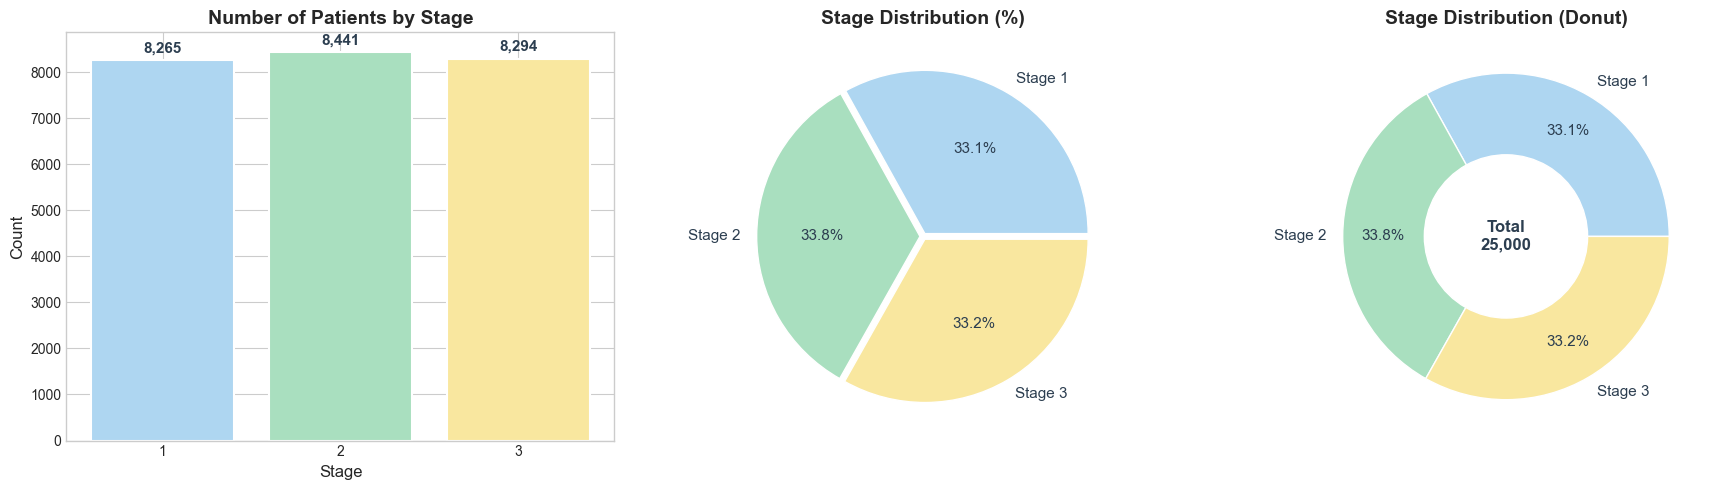


📊 Stage Distribution Summary:
  Stage 1: 8,265 patients (33.1%)
  Stage 2: 8,441 patients (33.8%)
  Stage 3: 8,294 patients (33.2%)


In [44]:
# Stage Distribution - Count of patients in each stage
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtle pastel colors for stages
stage_counts = df['Stage'].value_counts().sort_index()
n_stages = len(stage_counts)
subtle_stage_colors = ['#AED6F1', '#A9DFBF', '#F9E79F', '#F5B7B1'][:n_stages]

# 1. Bar Chart - Count per Stage
bars = axes[0].bar(stage_counts.index, stage_counts.values, color=subtle_stage_colors, 
                   edgecolor='white', linewidth=1.5)
axes[0].set_title('Number of Patients by Stage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks(stage_counts.index)

# Add count labels on bars
for bar, count in zip(bars, stage_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                 f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='#2C3E50')

# 2. Pie Chart - Proportion per Stage
axes[1].pie(stage_counts.values, labels=[f'Stage {int(i)}' for i in stage_counts.index], 
            autopct='%1.1f%%', colors=subtle_stage_colors, explode=[0.02]*n_stages,
            textprops={'fontsize': 11, 'color': '#2C3E50'}, 
            wedgeprops={'edgecolor': 'white', 'linewidth': 1})
axes[1].set_title('Stage Distribution (%)', fontsize=14, fontweight='bold')

# 3. Donut Chart with center text
wedges, texts, autotexts = axes[2].pie(stage_counts.values, labels=[f'Stage {int(i)}' for i in stage_counts.index],
                                        autopct='%1.1f%%', colors=subtle_stage_colors, 
                                        wedgeprops=dict(width=0.5, edgecolor='white', linewidth=1), 
                                        pctdistance=0.75, textprops={'fontsize': 11, 'color': '#2C3E50'})
axes[2].set_title('Stage Distribution (Donut)', fontsize=14, fontweight='bold')
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
axes[2].add_artist(centre_circle)
axes[2].text(0, 0, f'Total\n{len(df):,}', ha='center', va='center', fontsize=12, fontweight='bold', color='#2C3E50')

plt.tight_layout()
plt.show()

# Print summary
print("\n📊 Stage Distribution Summary:")
print("=" * 40)
for stage in sorted(df['Stage'].unique()):
    count = len(df[df['Stage'] == stage])
    pct = count / len(df) * 100
    print(f"  Stage {int(stage)}: {count:,} patients ({pct:.1f}%)")

## 11 Status Distribution Across Stages

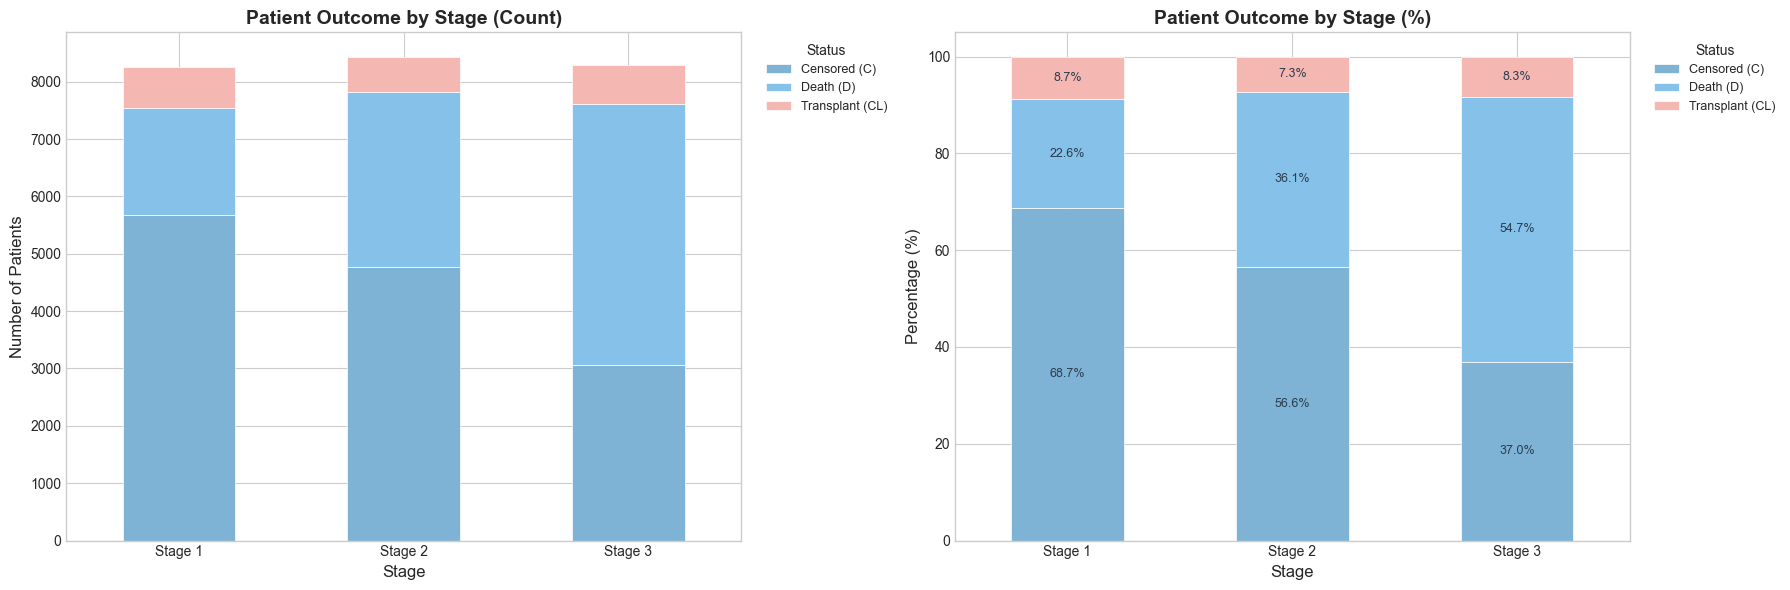


📊 Status by Stage (Crosstab):
Status_Label  Censored (C)  Death (D)  Transplant (CL)    All
Stage                                                        
1                     5676       1866              723   8265
2                     4775       3050              616   8441
3                     3065       4540              689   8294
All                  13516       9456             2028  25000


In [45]:
# Status Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle color palette
subtle_colors = ['#7FB3D5', '#85C1E9', '#F5B7B1']  # Soft blue tones and soft red

# Map Status codes back to labels for better visualization
status_labels = {0: 'Censored (C)', 1: 'Transplant (CL)', 2: 'Death (D)'}
df['Status_Label'] = df['Status_Encoded'].map(status_labels)

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Stacked Bar Chart - Count
status_stage = pd.crosstab(df['Stage'], df['Status_Label'])
status_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                  color=subtle_colors, edgecolor='white', linewidth=0.5)
axes[0].set_title('Patient Outcome by Stage (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Number of Patients', fontsize=12)
axes[0].legend(title='Status', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Stacked Bar Chart - Percentage (Normalized)
status_stage_pct = pd.crosstab(df['Stage'], df['Status_Label'], normalize='index') * 100
status_stage_pct.plot(kind='bar', stacked=True, ax=axes[1], 
                       color=subtle_colors, edgecolor='white', linewidth=0.5)
axes[1].set_title('Patient Outcome by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Status', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
axes[1].set_xticklabels(stage_labels, rotation=0)

# Add percentage labels
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=9, color='#2C3E50')

plt.tight_layout()
plt.show()

# Print crosstab
print("\n📊 Status by Stage (Crosstab):")
print("=" * 50)
print(pd.crosstab(df['Stage'], df['Status_Label'], margins=True))

## 12 Categorical Features Proportion Across Stages

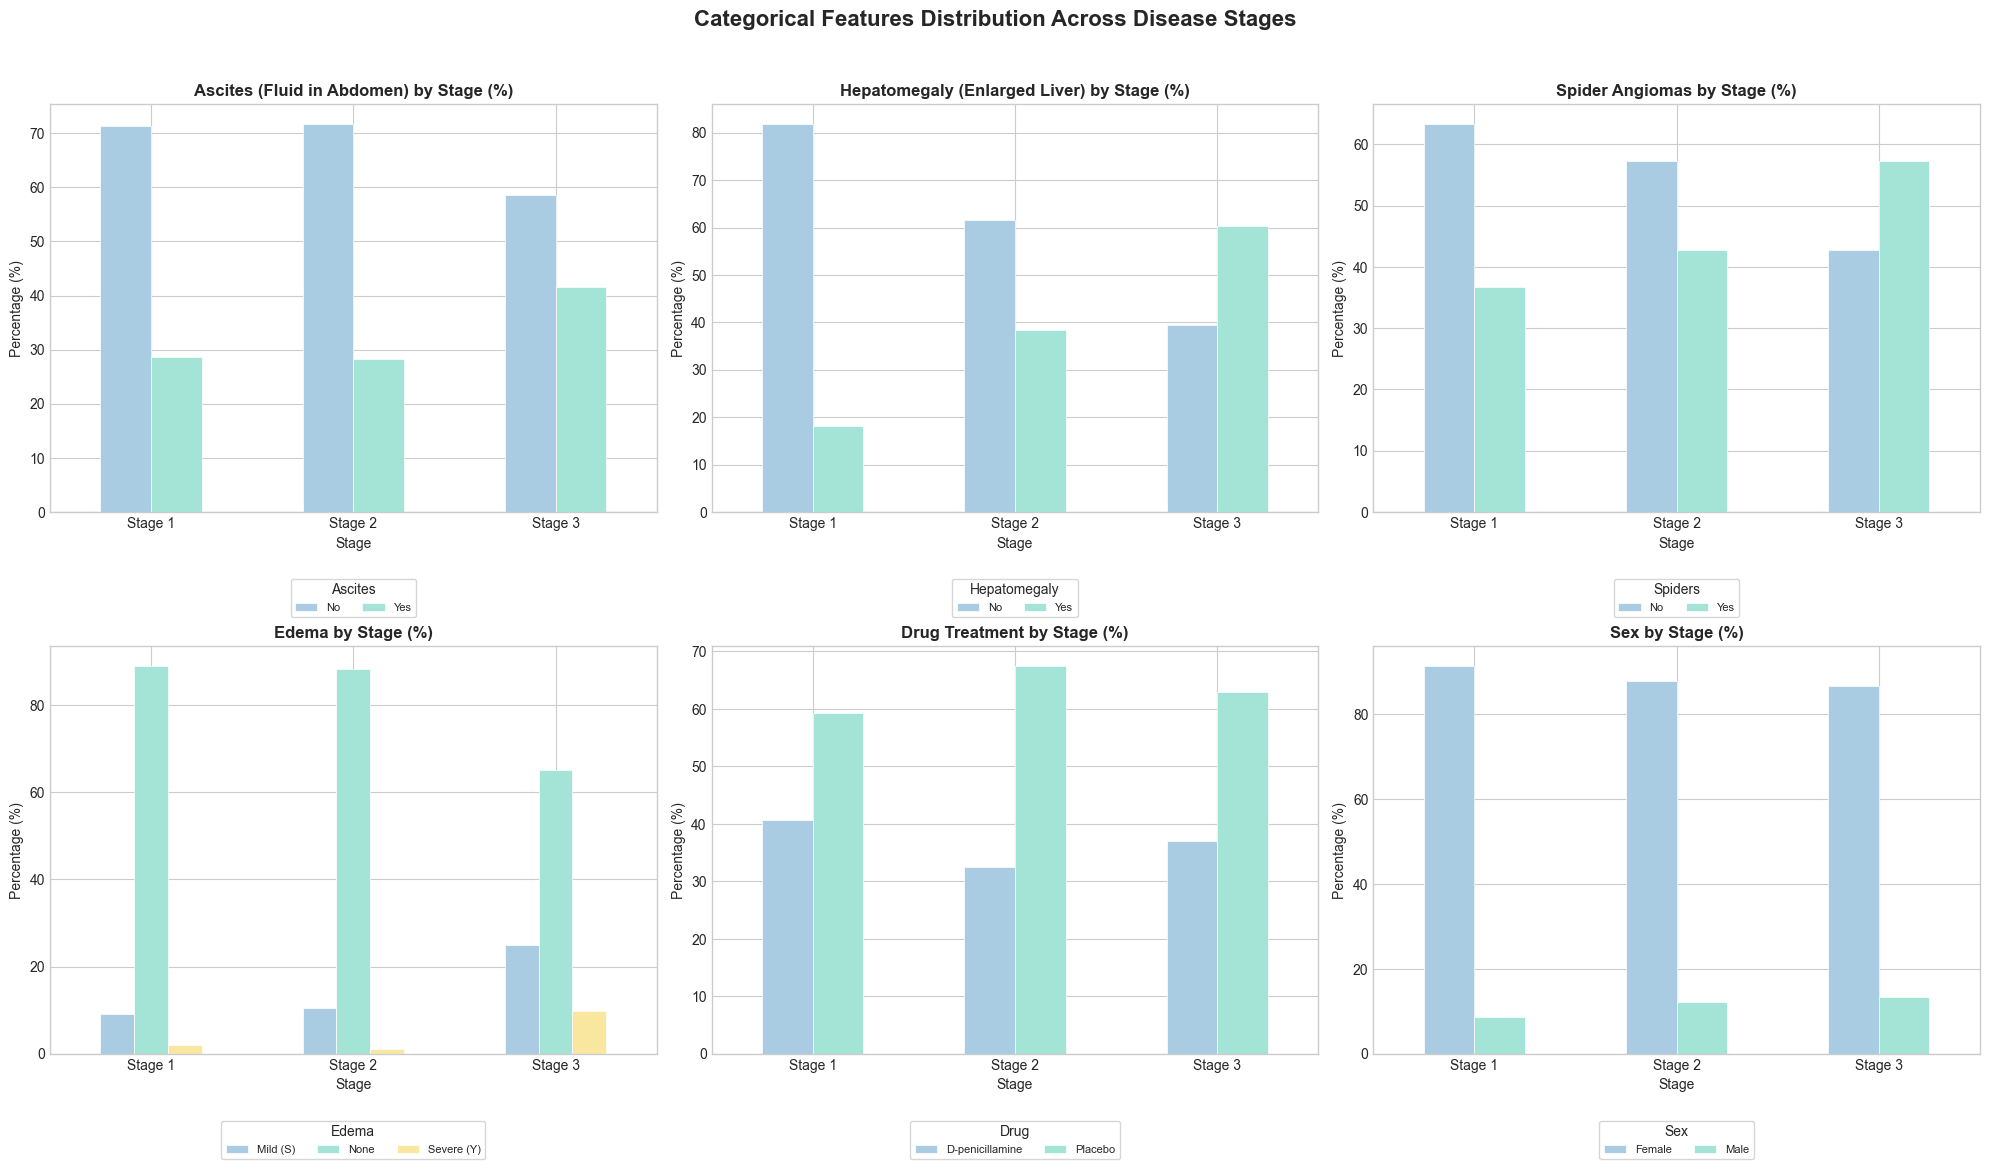

In [46]:
# Categorical Features Proportion Across Stages
# Ascites, Hepatomegaly, Spiders, Edema, Drug, Sex

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Subtle pastel color palette
pastel_palette = ['#A9CCE3', '#A3E4D7', '#F9E79F', '#F5B7B1', '#D7BDE2']

# Map binary to labels
df['Ascites_Label'] = df['Ascites'].map({0: 'No', 1: 'Yes'})
df['Hepatomegaly_Label'] = df['Hepatomegaly'].map({0: 'No', 1: 'Yes'})
df['Spiders_Label'] = df['Spiders'].map({0: 'No', 1: 'Yes'})
df['Edema_Label'] = df['Edema'].map({0: 'None', 1: 'Mild (S)', 2: 'Severe (Y)'})
df['Drug_Label'] = df['Drug'].map({0: 'Placebo', 1: 'D-penicillamine'})
df['Sex_Label'] = df['Sex'].map({0: 'Female', 1: 'Male'})

cat_features = [
    ('Ascites_Label', 'Ascites (Fluid in Abdomen)'),
    ('Hepatomegaly_Label', 'Hepatomegaly (Enlarged Liver)'),
    ('Spiders_Label', 'Spider Angiomas'),
    ('Edema_Label', 'Edema'),
    ('Drug_Label', 'Drug Treatment'),
    ('Sex_Label', 'Sex')
]

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

for idx, (col, title) in enumerate(cat_features):
    ct = pd.crosstab(df['Stage'], df[col], normalize='index') * 100
    n_cols = len(ct.columns)
    ct.plot(kind='bar', ax=axes[idx], color=pastel_palette[:n_cols], edgecolor='white', linewidth=0.5)
    axes[idx].set_title(f'{title} by Stage (%)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stage', fontsize=10)
    axes[idx].set_ylabel('Percentage (%)', fontsize=10)
    axes[idx].legend(title=col.replace('_Label', ''), loc='upper center', 
                     bbox_to_anchor=(0.5, -0.15), ncol=3, fontsize=8, frameon=True)
    axes[idx].set_xticklabels(stage_labels, rotation=0)

plt.suptitle('Categorical Features Distribution Across Disease Stages', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

## 13 Numerical Features Distribution Across Stages

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette,
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette,
C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\3870445286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_pale

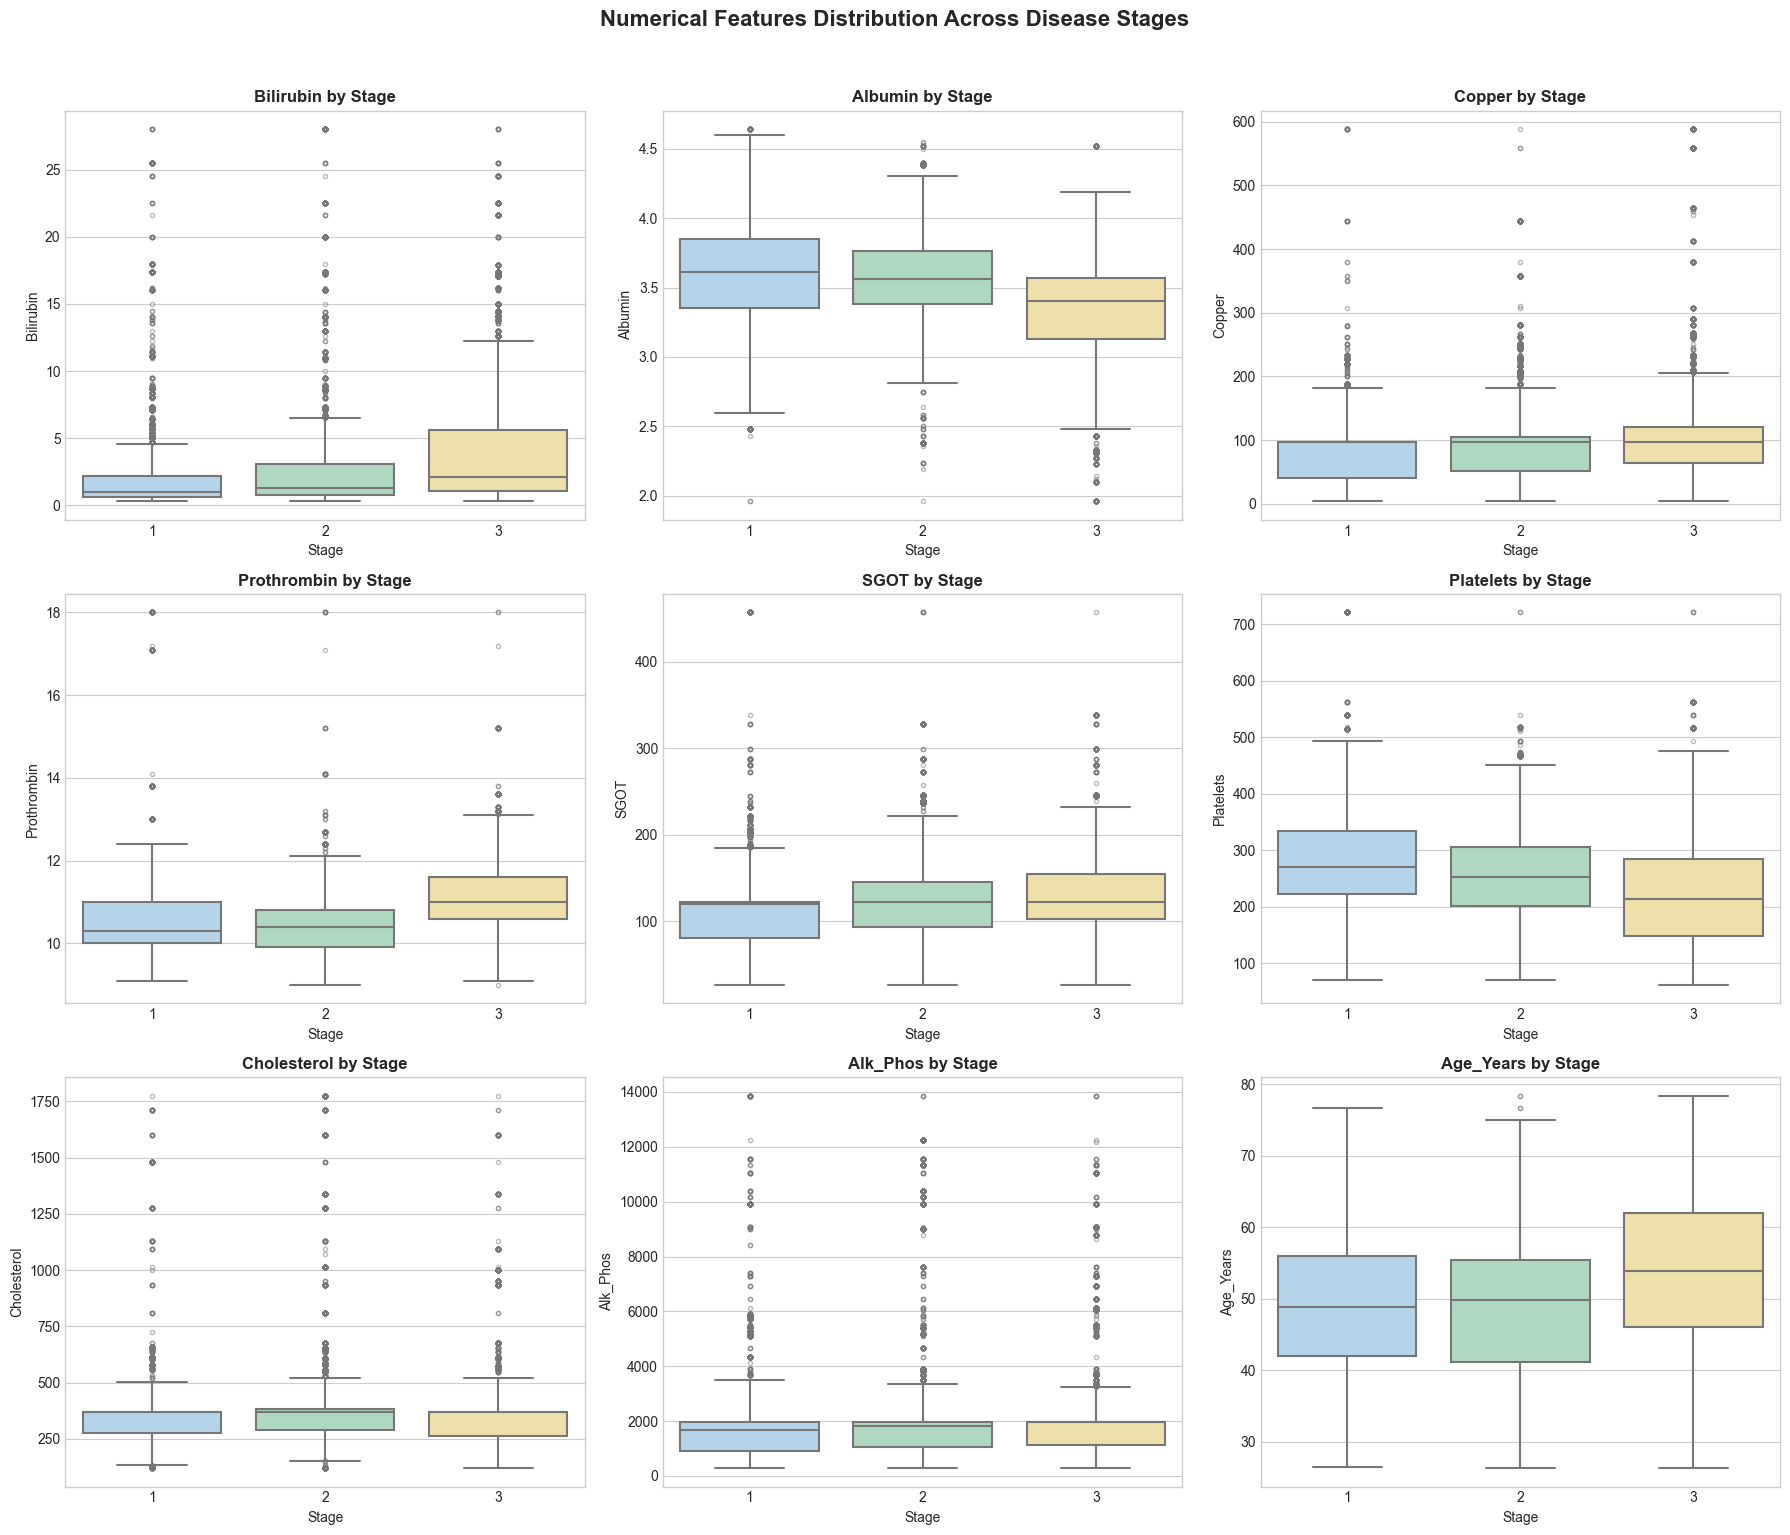


📊 Mean Values by Stage:
Stage              1        2        3
Bilirubin       2.47     3.32     4.42
Albumin         3.55     3.57     3.34
Copper         87.74   101.30   111.44
Prothrombin    10.54    10.50    11.18
SGOT          110.77   127.27   131.34
Platelets     285.56   257.61   224.92
Cholesterol   350.90   402.44   363.05
Alk_Phos     1780.65  2050.77  2153.88
Age_Years      49.29    49.19    53.46


In [48]:
# Numerical Features Distribution Across Stages (Box Plots)
num_features = ['Bilirubin', 'Albumin', 'Copper', 'Prothrombin', 'SGOT', 'Platelets', 
                'Cholesterol', 'Alk_Phos', 'Age_Years']

# Subtle pastel palette for box plots
box_palette = ['#AED6F1', '#A9DFBF', '#F9E79F']  # Light blue, light green, light yellow

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for idx, col in enumerate(num_features):
    sns.boxplot(data=df, x='Stage', y=col, ax=axes[idx], palette=box_palette, 
                linewidth=1.5, flierprops={'marker': 'o', 'markersize': 3, 'alpha': 0.5})
    axes[idx].set_title(f'{col} by Stage', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Stage', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.suptitle('Numerical Features Distribution Across Disease Stages', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary statistics by Stage
print("\n📊 Mean Values by Stage:")
print("=" * 80)
print(df.groupby('Stage')[num_features].mean().round(2).T)

## 14 Bilirubin Category Distribution Across Stages

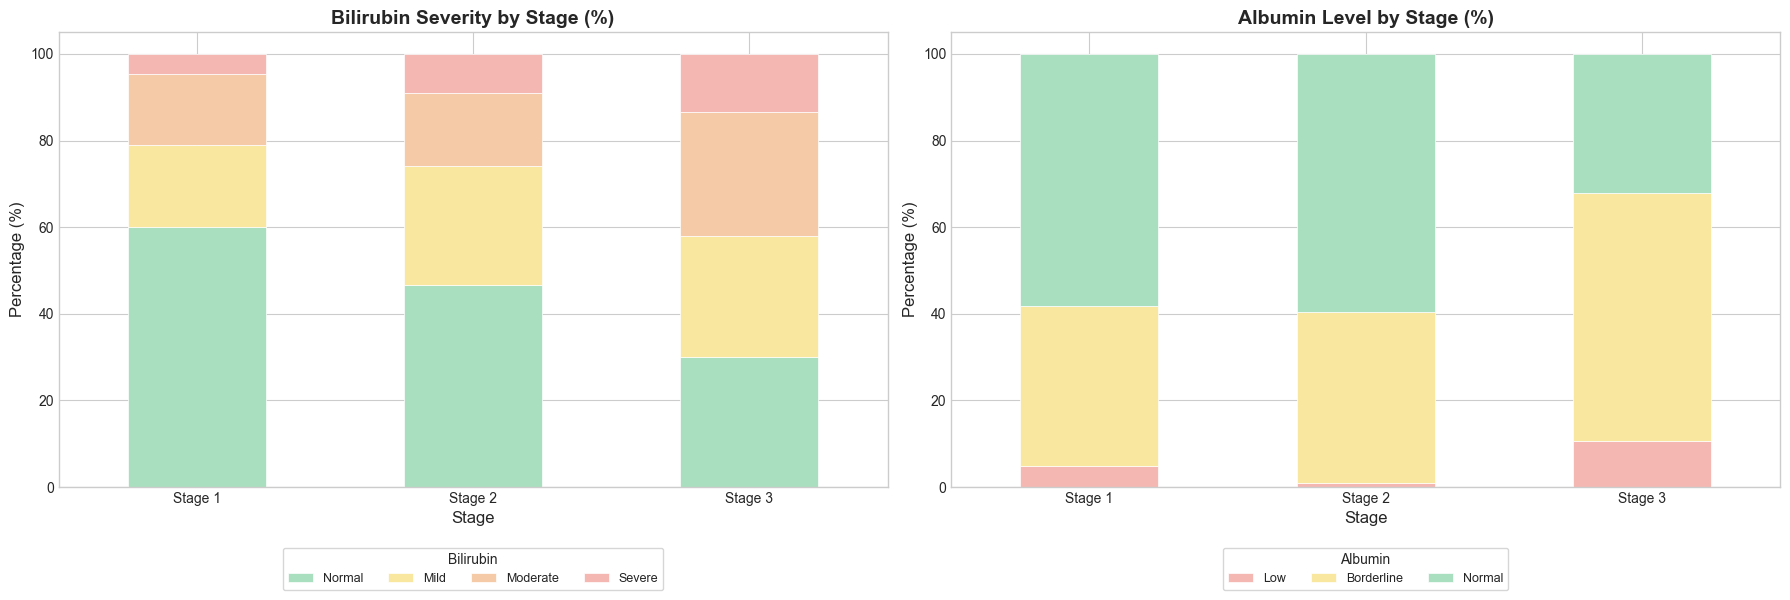


📊 Bilirubin Category by Stage:
Bilirubin_Category  Mild  Moderate  Normal  Severe    All
Stage                                                    
1                   1570      1351    4963     381   8265
2                   2336      1410    3929     766   8441
3                   2324      2372    2480    1118   8294
All                 6230      5133   11372    2265  25000

📊 Albumin Category by Stage:
Albumin_Category  Borderline   Low  Normal    All
Stage                                            
1                       3055   405    4805   8265
2                       3326    83    5032   8441
3                       4752   872    2670   8294
All                    11133  1360   12507  25000


In [49]:
# Bilirubin Category & Albumin Category Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle clinical color palette (green=good, yellow=warning, orange=moderate, red=severe)
bili_colors = ['#A9DFBF', '#F9E79F', '#F5CBA7', '#F5B7B1']  # Normal, Mild, Moderate, Severe
alb_colors = ['#F5B7B1', '#F9E79F', '#A9DFBF']  # Low, Borderline, Normal

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Bilirubin Category by Stage
bili_stage = pd.crosstab(df['Stage'], df['Bilirubin_Category'], normalize='index') * 100
# Reorder columns if they exist
bili_cols = [c for c in ['Normal', 'Mild', 'Moderate', 'Severe'] if c in bili_stage.columns]
bili_stage = bili_stage[bili_cols]
bili_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                color=bili_colors[:len(bili_cols)], edgecolor='white', linewidth=0.5)
axes[0].set_title('Bilirubin Severity by Stage (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(title='Bilirubin', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=4, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Albumin Category by Stage
alb_stage = pd.crosstab(df['Stage'], df['Albumin_Category'], normalize='index') * 100
# Reorder columns if they exist
alb_cols = [c for c in ['Low', 'Borderline', 'Normal'] if c in alb_stage.columns]
alb_stage = alb_stage[alb_cols]
alb_stage.plot(kind='bar', stacked=True, ax=axes[1], 
               color=alb_colors[:len(alb_cols)], edgecolor='white', linewidth=0.5)
axes[1].set_title('Albumin Level by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Albumin', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=3, fontsize=9, frameon=True)
axes[1].set_xticklabels(stage_labels, rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)
plt.show()

print("\n📊 Bilirubin Category by Stage:")
print(pd.crosstab(df['Stage'], df['Bilirubin_Category'], margins=True))
print("\n📊 Albumin Category by Stage:")
print(pd.crosstab(df['Stage'], df['Albumin_Category'], margins=True))

## 15 Age Group Distribution Across Stages

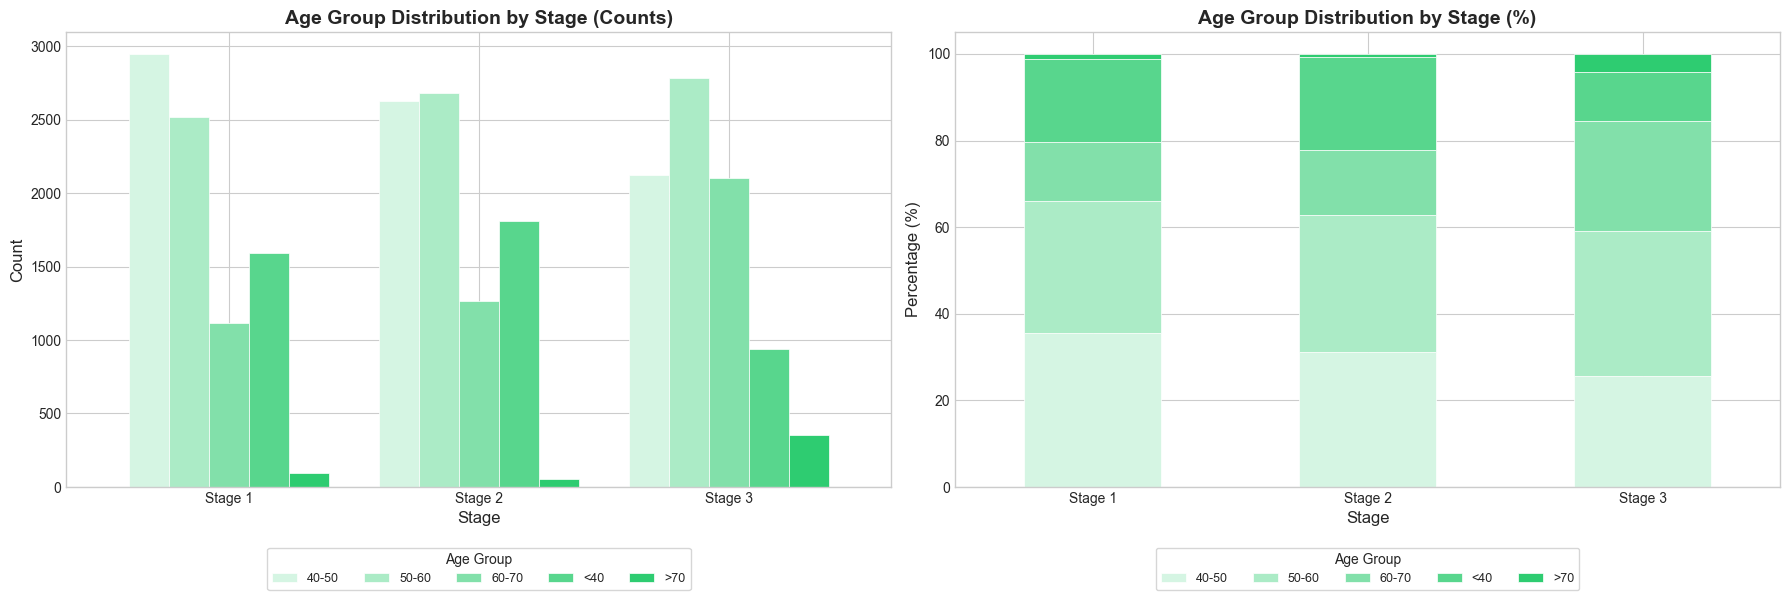


📊 Age Group by Stage:
Age_Group  40-50  50-60  60-70   <40  >70    All
Stage                                           
1           2947   2517   1114  1594   93   8265
2           2629   2681   1264  1810   57   8441
3           2120   2784   2100   938  352   8294
All         7696   7982   4478  4342  502  25000


In [50]:
# Age Group Distribution Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle age gradient palette (light to darker)
age_colors = ['#D5F5E3', '#ABEBC6', '#82E0AA', '#58D68D', '#2ECC71']

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Grouped bar chart
age_stage = pd.crosstab(df['Stage'], df['Age_Group'])
n_age_groups = len(age_stage.columns)
age_stage.plot(kind='bar', ax=axes[0], color=age_colors[:n_age_groups], edgecolor='white', linewidth=0.5, width=0.8)
axes[0].set_title('Age Group Distribution by Stage (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].legend(title='Age Group', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=5, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# 2. Stacked percentage
age_stage_pct = pd.crosstab(df['Stage'], df['Age_Group'], normalize='index') * 100
age_stage_pct.plot(kind='bar', stacked=True, ax=axes[1], color=age_colors[:n_age_groups], edgecolor='white', linewidth=0.5)
axes[1].set_title('Age Group Distribution by Stage (%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Percentage (%)', fontsize=12)
axes[1].legend(title='Age Group', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=5, fontsize=9, frameon=True)
axes[1].set_xticklabels(stage_labels, rotation=0)

plt.tight_layout()
plt.subplots_adjust(bottom=0.18)
plt.show()

print("\n📊 Age Group by Stage:")
print(pd.crosstab(df['Stage'], df['Age_Group'], margins=True))

## 16 Complications Analysis Across Stages

C:\Users\Hemanth Kumar\AppData\Local\Temp\ipykernel_18820\542910911.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Stage', y='Complication_Count', ax=axes[1],


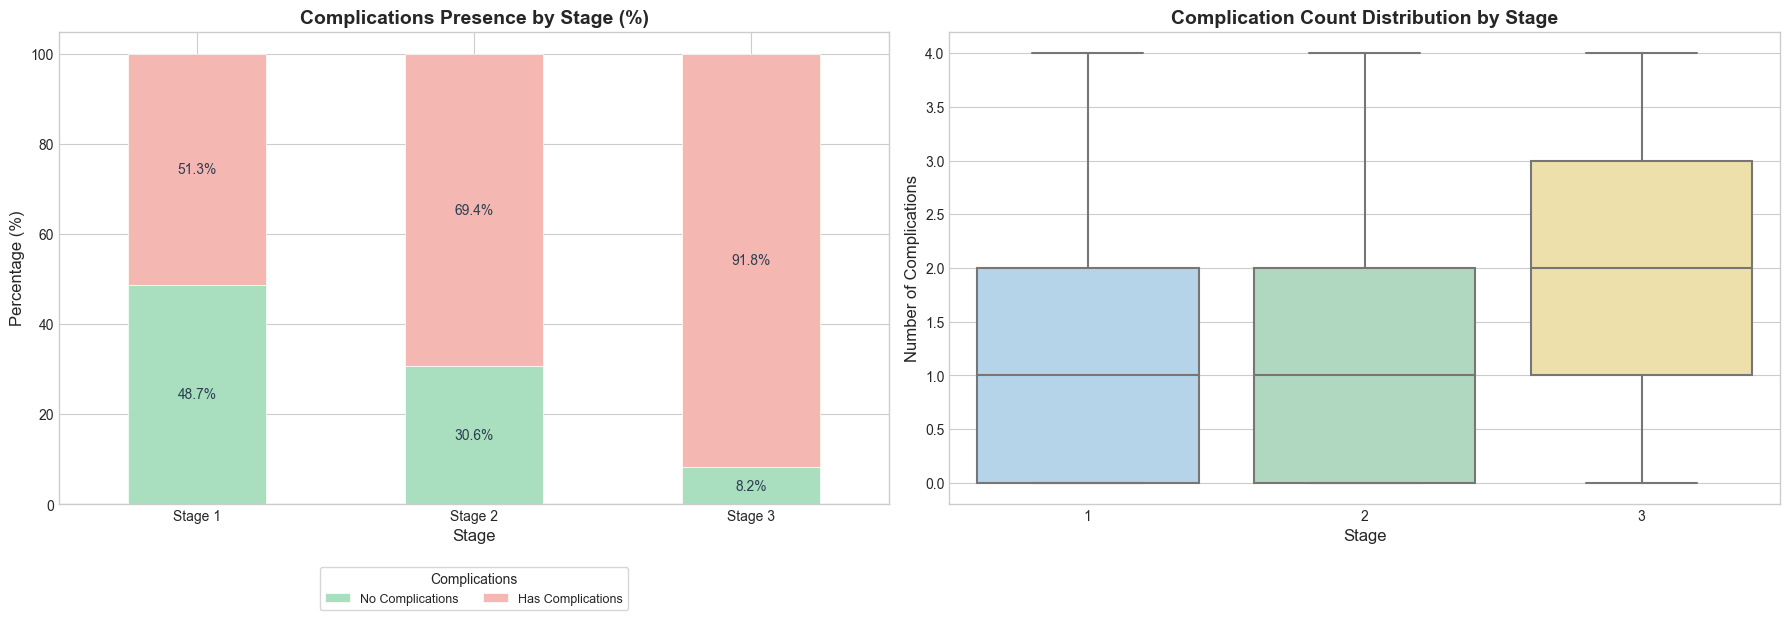


📊 Complications Rate by Stage:
       Patients with Complications  Total Patients Complications Rate
Stage                                                                
1                             4238            8265             51.28%
2                             5855            8441             69.36%
3                             7613            8294             91.79%

📊 Average Complication Count by Stage:
       mean   std  max
Stage                 
1      0.94  1.00    4
2      1.21  0.91    4
3      1.94  0.98    4


In [47]:
# Complications Analysis Across Stages
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subtle colors (green=no complications, soft coral=has complications)
comp_colors = ['#A9DFBF', '#F5B7B1']

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

# 1. Has Complications by Stage (Stacked Bar)
comp_stage = pd.crosstab(df['Stage'], df['Has_Complications'], normalize='index') * 100
comp_stage.columns = ['No Complications', 'Has Complications']
comp_stage.plot(kind='bar', stacked=True, ax=axes[0], 
                color=comp_colors, edgecolor='white', linewidth=0.5)
axes[0].set_title('Complications Presence by Stage (%)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Stage', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].legend(title='Complications', loc='upper center', bbox_to_anchor=(0.5, -0.12), 
               ncol=2, fontsize=9, frameon=True)
axes[0].set_xticklabels(stage_labels, rotation=0)

# Add percentage labels on the stacked bars
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='#2C3E50')

# 2. Complication Count by Stage (using seaborn for better styling)
box_palette = ['#AED6F1', '#A9DFBF', '#F9E79F']  # Light blue, light green, light yellow
sns.boxplot(data=df, x='Stage', y='Complication_Count', ax=axes[1], 
            palette=box_palette[:len(unique_stages)], linewidth=1.5,
            flierprops={'marker': 'o', 'markersize': 4, 'alpha': 0.5})
axes[1].set_title('Complication Count Distribution by Stage', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Number of Complications', fontsize=12)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

# Statistics
print("\n📊 Complications Rate by Stage:")
comp_rate = df.groupby('Stage')['Has_Complications'].agg(['sum', 'count', 'mean'])
comp_rate.columns = ['Patients with Complications', 'Total Patients', 'Complications Rate']
comp_rate['Complications Rate'] = (comp_rate['Complications Rate'] * 100).round(2).astype(str) + '%'
print(comp_rate)

print("\n📊 Average Complication Count by Stage:")
print(df.groupby('Stage')['Complication_Count'].agg(['mean', 'std', 'max']).round(2))

## 17 Correlation Heatmap - Key Features

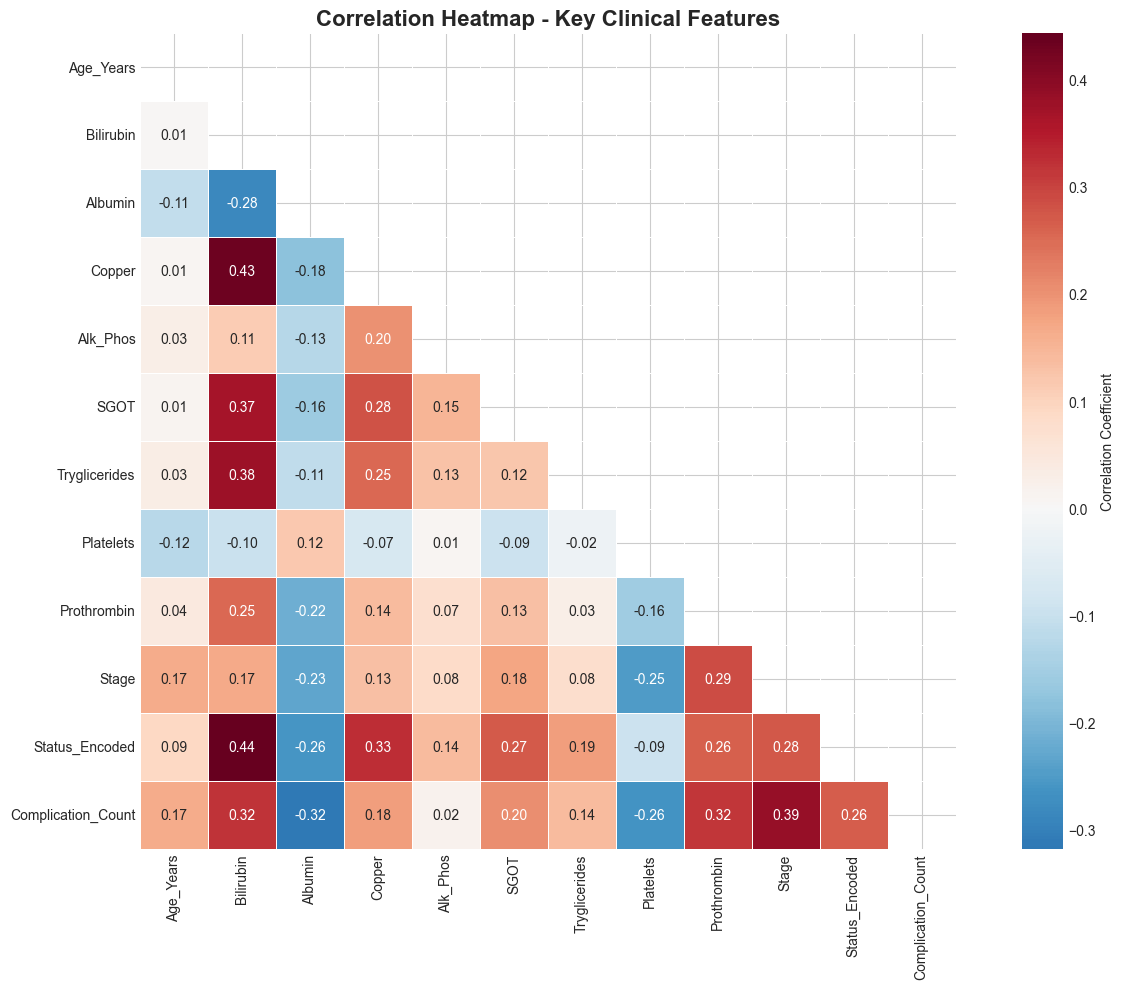


📊 Strongest Correlations with Status_Encoded:
Bilirubin             0.443
Copper                0.327
Stage                 0.275
SGOT                  0.268
Complication_Count    0.265
Prothrombin           0.264
Albumin              -0.260
Tryglicerides         0.185
Alk_Phos              0.142
Platelets            -0.094
Age_Years             0.090
Name: Status_Encoded, dtype: float64

📊 Strongest Correlations with Stage:
Complication_Count    0.385
Prothrombin           0.288
Status_Encoded        0.275
Platelets            -0.250
Albumin              -0.232
SGOT                  0.175
Bilirubin             0.168
Age_Years             0.166
Copper                0.132
Alk_Phos              0.084
Tryglicerides         0.079
Name: Stage, dtype: float64


In [41]:
# Correlation Heatmap for Key Numerical Features
key_features = ['Age_Years', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 
                'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 
                'Stage', 'Status_Encoded', 'Complication_Count']

# Filter only existing columns
existing_features = [col for col in key_features if col in df.columns]
corr_matrix = df[existing_features].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Upper triangle mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, linewidths=0.5, square=True,
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap - Key Clinical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Strongest correlations with Status
print("\n📊 Strongest Correlations with Status_Encoded:")
status_corr = corr_matrix['Status_Encoded'].drop('Status_Encoded').sort_values(key=abs, ascending=False)
print(status_corr.round(3))

print("\n📊 Strongest Correlations with Stage:")
stage_corr = corr_matrix['Stage'].drop('Stage').sort_values(key=abs, ascending=False)
print(stage_corr.round(3))

## 18 Summary Statistics by Stage & Status

In [42]:
# Comprehensive Summary Statistics by Stage
clinical_features = ['Age_Years', 'Bilirubin', 'Albumin', 'Copper', 'Alk_Phos', 
                     'SGOT', 'Platelets', 'Prothrombin']

print("=" * 80)
print("📋 CLINICAL FEATURE SUMMARY BY STAGE")
print("=" * 80)

# Get unique stages dynamically
unique_stages = sorted(df['Stage'].unique())
stage_labels = [f'Stage {int(s)}' for s in unique_stages]

for feature in clinical_features:
    if feature in df.columns:
        print(f"\n📊 {feature}:")
        summary = df.groupby('Stage')[feature].agg(['mean', 'std', 'median', 'min', 'max'])
        summary.index = stage_labels
        print(summary.round(2))

print("\n" + "=" * 80)
print("📋 CLINICAL FEATURE SUMMARY BY STATUS")
print("=" * 80)

for feature in clinical_features:

    if feature in df.columns:        
        summary = df.groupby('Status')[feature].agg(['mean', 'std', 'median', 'min', 'max'])
        print(summary.round(2))
        print(f"\n📊 {feature}:")        


📋 CLINICAL FEATURE SUMMARY BY STAGE

📊 Age_Years:
          mean    std  median   min   max
Stage 1  49.29   9.73    48.9  26.4  76.7
Stage 2  49.19  10.04    49.8  26.3  78.4
Stage 3  53.46  10.33    53.9  26.3  78.4

📊 Bilirubin:
         mean   std  median  min   max
Stage 1  2.47  3.79     1.0  0.3  28.0
Stage 2  3.32  4.88     1.3  0.3  28.0
Stage 3  4.42  5.14     2.1  0.3  28.0

📊 Albumin:
         mean   std  median   min   max
Stage 1  3.55  0.38    3.61  1.96  4.64
Stage 2  3.57  0.33    3.56  1.96  4.55
Stage 3  3.34  0.39    3.40  1.96  4.52

📊 Copper:
           mean    std  median  min    max
Stage 1   87.74  55.99   97.65  4.0  588.0
Stage 2  101.30  74.70   97.65  4.0  588.0
Stage 3  111.44  84.03   97.65  4.0  588.0

📊 Alk_Phos:
            mean      std   median    min      max
Stage 1  1780.65  1520.07  1692.00  289.0  13862.4
Stage 2  2050.77  1958.57  1812.00  289.0  13862.4
Stage 3  2153.88  1863.88  1982.66  289.0  13862.4

📊 SGOT:
           mean    std  median 

## 33. Key Insights & EDA Conclusions

In [43]:
# Generate Key Insights Summary
print("=" * 80)
print("🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Dataset overview
print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total patients: {len(df):,}")
print(f"   • Features: {len(df.columns)} columns")
print(f"   • Target variable: Status (C=Censored, CL=Liver Transplant, D=Death)")

# Stage distribution
print(f"\n📊 STAGE DISTRIBUTION:")
stage_counts = df['Stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    pct = count / len(df) * 100
    print(f"   • Stage {int(stage)}: {count:,} patients ({pct:.1f}%)")

# Status distribution
print(f"\n📊 STATUS DISTRIBUTION:")
status_counts = df['Status'].value_counts()
for status, count in status_counts.items():
    pct = count / len(df) * 100
    status_name = {'C': 'Censored', 'CL': 'Liver Transplant', 'D': 'Death'}.get(status, status)
    print(f"   • {status_name} ({status}): {count:,} patients ({pct:.1f}%)")

# Key clinical findings
print(f"\n📊 KEY CLINICAL FINDINGS:")
print(f"   • Average age: {df['Age_Years'].mean():.1f} years (range: {df['Age_Years'].min():.0f}-{df['Age_Years'].max():.0f})")
print(f"   • Patients with complications: {df['Has_Complications'].sum():,} ({df['Has_Complications'].mean()*100:.1f}%)")

# Bilirubin severity
bili_severe = (df['Bilirubin_Category'] == 'Severe').sum()
print(f"   • Patients with severe bilirubin (>5 mg/dL): {bili_severe:,} ({bili_severe/len(df)*100:.1f}%)")

# Albumin levels
alb_low = (df['Albumin_Category'] == 'Low').sum()
print(f"   • Patients with low albumin (<3.5 g/dL): {alb_low:,} ({alb_low/len(df)*100:.1f}%)")

print("\n" + "=" * 80)
print("✅ EDA COMPLETE - Data is ready for model training!")
print("=" * 80)
print(f"\n📁 Processed data saved to: data/processed/cirrhosis_cleaned.csv")

🔍 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📊 DATASET OVERVIEW:
   • Total patients: 25,000
   • Features: 37 columns
   • Target variable: Status (C=Censored, CL=Liver Transplant, D=Death)

📊 STAGE DISTRIBUTION:
   • Stage 1: 8,265 patients (33.1%)
   • Stage 2: 8,441 patients (33.8%)
   • Stage 3: 8,294 patients (33.2%)

📊 STATUS DISTRIBUTION:
   • Censored (C): 13,516 patients (54.1%)
   • Death (D): 9,456 patients (37.8%)
   • Liver Transplant (CL): 2,028 patients (8.1%)

📊 KEY CLINICAL FINDINGS:
   • Average age: 50.6 years (range: 26-78)
   • Patients with complications: 17,706 (70.8%)
   • Patients with severe bilirubin (>5 mg/dL): 2,265 (9.1%)
   • Patients with low albumin (<3.5 g/dL): 1,360 (5.4%)

✅ EDA COMPLETE - Data is ready for model training!

📁 Processed data saved to: data/processed/cirrhosis_cleaned.csv
